In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score, log_loss

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Artificial_intelligence/Final

/content/drive/.shortcut-targets-by-id/1rXyFjNHA1kKlHYBQEZDRcyKZvYCZ0r6i/Artificial_intelligence/Final


In [4]:
ls

 AI.zip                        sign_language_recognition_and_classifition.ipynb
 CNN_letter_Dataset/           test/
'CNN letter Dataset.zip'       tmp/
 letter_classification.ipynb   train/
 license_plate_dataset.zip     yolo-v7-license-plate-detection.ipynb


In [ ]:
# %rm -rf Sample037

In [ ]:
# !unzip CNN\ letter\ Dataset.zip

In [ ]:
import cv2
from pathlib import Path
dataset = '/content/drive/MyDrive/Artificial_intelligence/Final/CNN_letter_Dataset/'
classnames = []
for path in Path(dataset).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(len(classnames))
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(dataset+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

35
['T', 'R', 'I', 'S', 'Y', '5', 'X', '0', 'E', '1', '2', 'N', 'B', '3', '4', '8', 'C', 'P', 'A', 'D', '6', 'M', 'G', 'L', '9', '7', 'H', 'K', 'W', 'Z', 'F', 'J', 'V', 'Q', 'U']
T
R
I
S
Y
5
X
0
E
1
2
N
B
3
4
8
C
P
A
D
6
M
G
L
9
7
H
K
W
Z
F
J
V
Q
U


In [6]:
import cv2
from pathlib import Path
dataset = '/content/drive/MyDrive/Artificial_intelligence/Final/CNN_letter_Dataset/'
classnames = []
for path in Path(dataset).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X_m = []
y_m = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(dataset+classnames[i]).glob('*'))
  for image in range(int(len(images))):
    img = cv2.imread(str(images[image]))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = img.astype('float32')
    img = img/255
    X_m.append(img)
    y_m.append(i)

['T', 'R', 'I', 'S', 'Y', '5', 'X', '0', 'E', '1', '2', 'N', 'B', '3', '4', '8', 'C', 'P', 'A', 'D', '6', 'M', 'G', 'L', '9', '7', 'H', 'K', 'W', 'Z', 'F', 'J', 'V', 'Q', 'U']
T
R
I
S
Y
5
X
0
E
1
2
N
B
3
4
8
C
P
A
D
6
M
G
L
9
7
H
K
W
Z
F
J
V
Q
U


In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [7]:
import numpy as np
X = np.array(X_m)
y = np.array(y_m)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4326, 28, 28, 3)
(1082, 28, 28, 3)
(4326, 35)
(1082, 35)


In [ ]:
print(y[1000])

2


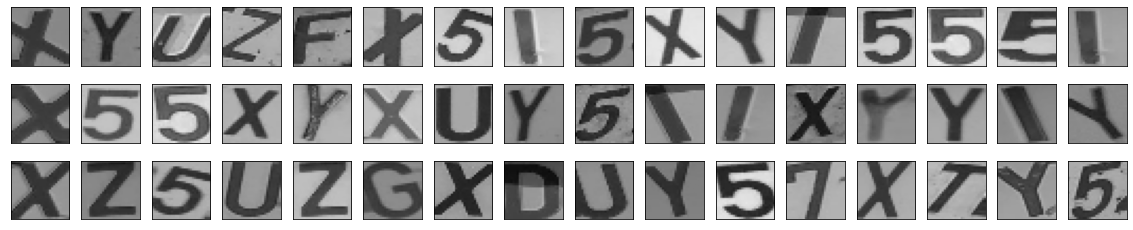

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,4))
for i in range(16):
  for j in range(3):
    plt.subplot(3, 16, 3*i+j+1)
    fig = plt.imshow(X_train[3*i+j])
    fig.set_cmap('hot')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=list(X_train[0].shape)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(len(classnames), activation=tf.nn.softmax))
# model_m.build()
model.summary() 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 49152)             0         
                                                                 
 dense_34 (Dense)            (None, 128)               6291584   
                                                                 
 dense_35 (Dense)            (None, 512)               66048     
                                                                 
 dense_36 (Dense)            (None, 1024)              525312    
                                                                 
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 dense_38 (Dense)            (None, 128)               65664     
                                                                 
 dense_39 (Dense)            (None, 35)              

In [ ]:
import keras
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)

Epoch 1/100
28/28 - 1s - loss: 3.7021 - accuracy: 0.2822 - 769ms/epoch - 27ms/step
Epoch 2/100
28/28 - 0s - loss: 1.4466 - accuracy: 0.5471 - 345ms/epoch - 12ms/step
Epoch 3/100
28/28 - 0s - loss: 1.2709 - accuracy: 0.5714 - 315ms/epoch - 11ms/step
Epoch 4/100
28/28 - 0s - loss: 1.3726 - accuracy: 0.5541 - 345ms/epoch - 12ms/step
Epoch 5/100
28/28 - 0s - loss: 1.1109 - accuracy: 0.6217 - 285ms/epoch - 10ms/step
Epoch 6/100
28/28 - 0s - loss: 0.9363 - accuracy: 0.7149 - 257ms/epoch - 9ms/step
Epoch 7/100
28/28 - 0s - loss: 0.9184 - accuracy: 0.7050 - 264ms/epoch - 9ms/step
Epoch 8/100
28/28 - 0s - loss: 0.8394 - accuracy: 0.7484 - 261ms/epoch - 9ms/step
Epoch 9/100
28/28 - 0s - loss: 0.7123 - accuracy: 0.7987 - 245ms/epoch - 9ms/step
Epoch 10/100
28/28 - 0s - loss: 1.0892 - accuracy: 0.7102 - 259ms/epoch - 9ms/step
Epoch 11/100
28/28 - 0s - loss: 0.7131 - accuracy: 0.7958 - 280ms/epoch - 10ms/step
Epoch 12/100
28/28 - 0s - loss: 0.6316 - accuracy: 0.8207 - 265ms/epoch - 9ms/step
Epoch 1

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape, padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
# ANN
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)    

In [11]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
model = Sequential()
inputShape = (X_train[0].shape)
# first set of CONV  => RELU => POOL layers
model.add(Conv2D(20,(5,5), padding='same', input_shape = inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#second set of CONV => RELU => POOL layers
model.add(Conv2D(50,(5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#first set of FC => RELU
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))

#softmax classifier
model.add(Dense(len(classnames)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
136/136 - 7s - loss: 0.9396 - accuracy: 0.7383 - 7s/epoch - 54ms/step
Epoch 2/20
136/136 - 0s - loss: 0.1168 - accuracy: 0.9693 - 404ms/epoch - 3ms/step
Epoch 3/20
136/136 - 0s - loss: 0.0295 - accuracy: 0.9942 - 429ms/epoch - 3ms/step
Epoch 4/20
136/136 - 0s - loss: 0.0088 - accuracy: 0.9984 - 408ms/epoch - 3ms/step
Epoch 5/20
136/136 - 0s - loss: 0.0134 - accuracy: 0.9975 - 431ms/epoch - 3ms/step
Epoch 6/20
136/136 - 0s - loss: 0.0012 - accuracy: 0.9998 - 423ms/epoch - 3ms/step
Epoch 7/20
136/136 - 0s - loss: 2.8234e-04 - accuracy: 1.0000 - 416ms/epoch - 3ms/step
Epoch 8/20
136/136 - 0s - loss: 1.9663e-04 - accuracy: 1.0000 - 424ms/epoch - 3ms/step
Epoch 9/20
136/136 - 0s - loss: 1.5347e-04 - accuracy: 1.0000 - 403ms/epoch - 3ms/step
Epoch 10/20
136/136 - 0s - loss: 1.2027e-04 - accuracy: 1.0000 - 410ms/epoch - 3ms/step
Epoch 11/20
136/136 - 0s - loss: 1.0047e-04 - accuracy: 1.0000 - 407ms/epoch - 3ms/step
Epoch 12/20
136/136 - 0s - loss: 8.4089e-05 - accuracy: 1.0000 - 40

In [18]:
!cd /content/drive/MyDrive/Artificial_intelligence/Final
model.save('letter_weight_28283.h5')

In [ ]:
model = keras.models.load_model('letter_weight.h5')

In [19]:
ls

 AI.zip                        sign_language_recognition_and_classifition.ipynb
 CNN_letter_Dataset/           test/
'CNN letter Dataset.zip'       tmp/
 letter_classification.ipynb   train/
 letter_weight_28283.h5        yolo-v7-license-plate-detection.ipynb
 license_plate_dataset.zip


In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

34/34 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9963
0.055993154644966125
0.996303141117096


In [ ]:
y_predict = model.predict(X_test)
y_pred = []
for i in range(0,10000):
    y_pred.append(np.argmax(y_predict[i]))
#y_predict = np.argmax(y_predict[i])
cm = confusion_matrix(y_test,y_pred)

print(accuracy_score(y_test, y_pred))

10/10 [==============================] - 0s 3ms/step


IndexError: ignored

(28, 28, 3)
2/2 [==============================] - 0s 10ms/step
Pred:  X
True label:  X


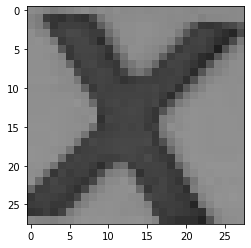

In [25]:
n = 130
# n+=1
print(X_test[n].shape)
n2 =11
plt.imshow(X_test[n+n2])
# pred = model.predict(X_test[n].reshape(1, 28, 28))
pred = model.predict(X_test[n:n+50])
# print(pred[0])
print('Pred: ', classnames[pred[n2].argmax()])
print('True label: ', classnames[y_test[n+n2].argmax()])